#  Customers Churn  Prediction

# Problem Statement

What is Customer Churn?

Customer churn is the percentage of customers that stopped using company's product or service during a certain time frame. Customer churn is one of the most important metrics for a growing business to evaluate as it is much less expensive to retain existing customers than it is to acquire new customers. Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

# Objectives
Which features have the most impact on predicting customers churn?



# Dataset Features
Customer ID: A unique ID that identifies each customer.

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

tenure: Number of months the customer has stayed with the company

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Target, Whether the customer has left within the last month or not (Yes or No)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# balance data
from imblearn.over_sampling import SMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,auc,f1_score,precision_score, recall_score
from sklearn.model_selection import KFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset 
data = pd.read_csv('CHURN_DATA.csv')
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2293,9339-FIIJL,Male,0,Yes,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),85.95,6151.9,No
4818,8348-JLBUG,Male,1,Yes,No,64,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Credit card (automatic),80.30,5017.7,No
1316,9788-YTFGE,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,147.5,No
3861,0479-HMSWA,Female,0,No,Yes,26,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,105.45,2715.3,No
6897,2363-BJLSL,Male,0,No,No,62,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),80.40,4981.15,No
5635,2087-QAREY,Female,0,Yes,No,22,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.70,1178.75,No
1322,0114-RSRRW,Female,0,Yes,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.95,187.75,No
2059,7483-IQWIB,Male,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,92.95,3415.25,No
3932,1304-NECVQ,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.55,149.55,Yes
4082,0112-QWPNC,Male,0,Yes,No,49,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,84.35,4059.35,Yes


# Datasets Information

In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### Checking Missing Value 

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value in the dataset.

# Data Visualization

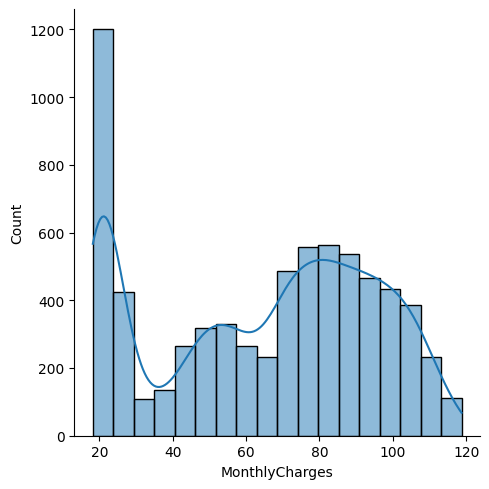

In [8]:
sns.displot(x=data["MonthlyCharges"],kde=True)

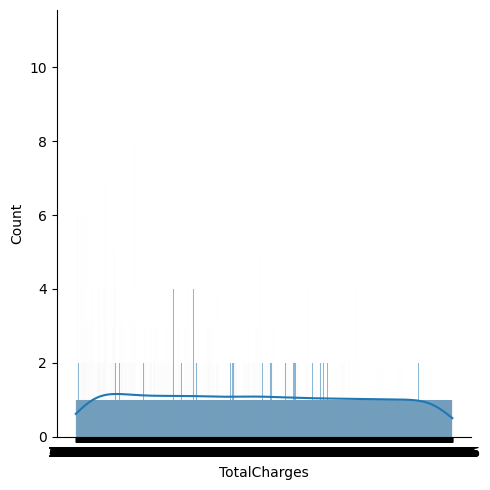

In [9]:
sns.displot(x=data["TotalCharges"],kde=True)

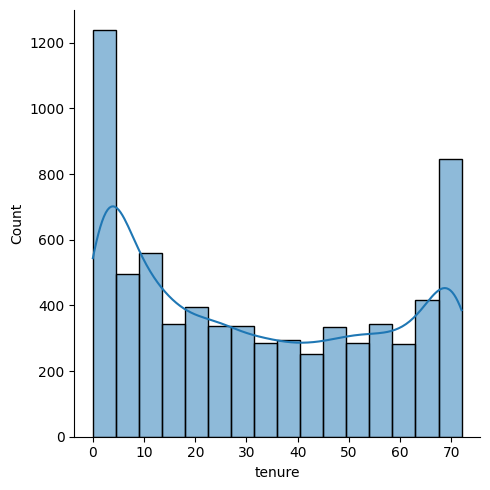

In [10]:
sns.displot(x=data["tenure"],kde=True)

Text(0.5, 1.0, '% of Churning')

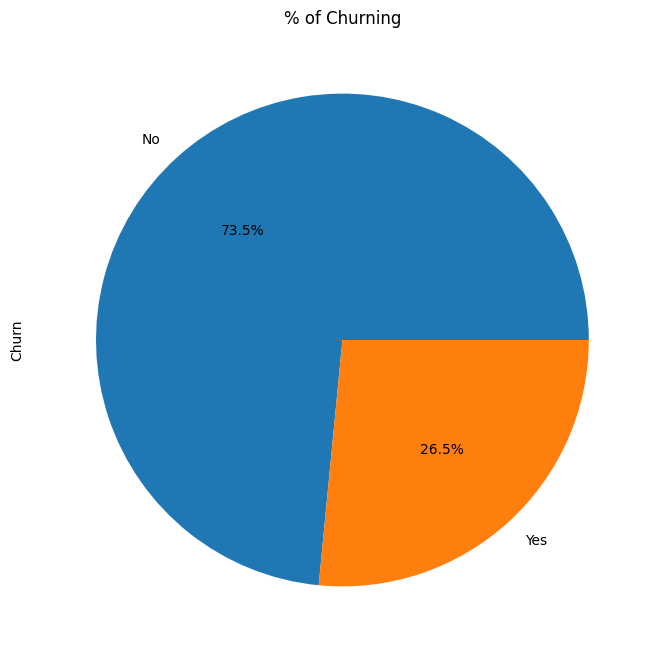

In [11]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Churning")

We have imbalanced data.

26.5% of customers switched to another company.

# Gender and Churn Distribuions

<AxesSubplot: xlabel='Churn', ylabel='count'>

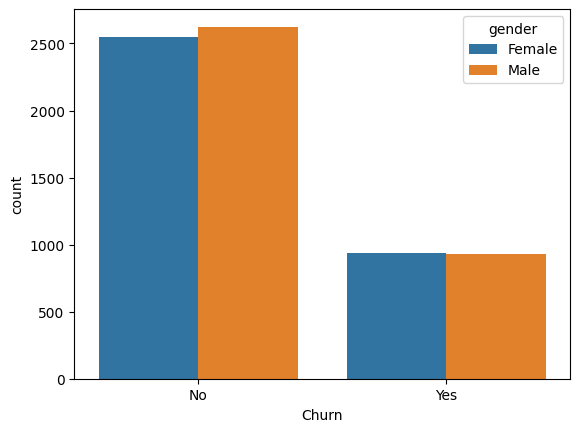

In [12]:
sns.countplot(x="Churn",data=data,hue="gender")

In [13]:
print(f'A female customer has a probability of {round(data[(data["gender"] == "Female") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Female")].count()[0] *100,2)} % churn')

print(f'A male customer has a probability of {round(data[(data["gender"] == "Male") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Female")].count()[0] *100,2)} % churn')

A female customer has a probability of 26.92 % churn
A male customer has a probability of 26.66 % churn


There is negligible difference in customer percentage who changed the service provider. Both genders behaved in similar way when it comes to migrating to another service provider.

# Customer Contract Distribution w.r.t Churn

<AxesSubplot: xlabel='Churn', ylabel='count'>

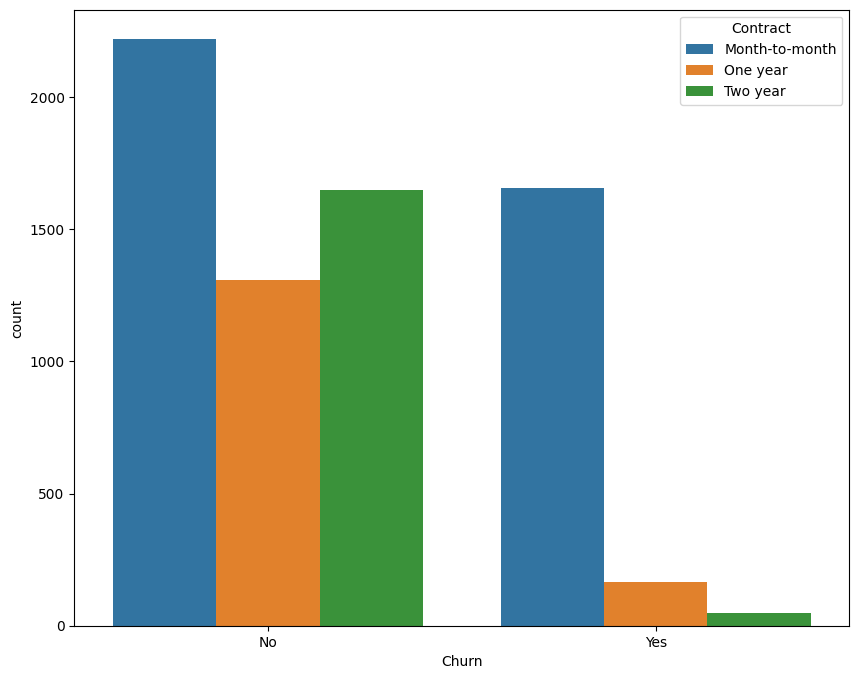

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue="Contract")

In [15]:
print(f'A customer with month-to-month contract has a probability of {round(data[(data["Contract"] == "Month-to-month") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "Month-to-month")].count()[0] *100,2)} % churn')

print(f'A customer with one year contract has a probability of {round(data[(data["Contract"] == "One year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "One year")].count()[0]*100,2)} % churn')

print(f'A customer with two year contract has a probability of {round(data[(data["Contract"] == "Two year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "One year")].count()[0]*100,2)} % churn')


A customer with month-to-month contract has a probability of 42.71 % churn
A customer with one year contract has a probability of 11.27 % churn
A customer with two year contract has a probability of 3.26 % churn


About 43% of customer with Month-to-Month Contract opted to move out as compared to 11% of customrs with One Year Contract and 3% with Two Year Contract. A major percent of people who left the comapny had Month-to-Month Contract.

# Payment Method Distribution w.r.t Churn

Text(0.5, 1.0, '% of Payment Method')

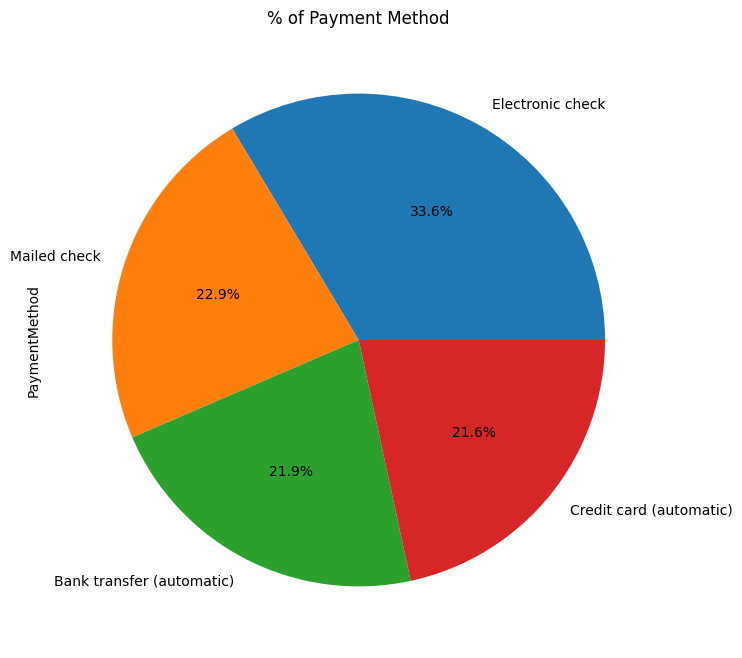

In [16]:
data['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Payment Method")

<AxesSubplot: xlabel='Churn', ylabel='count'>

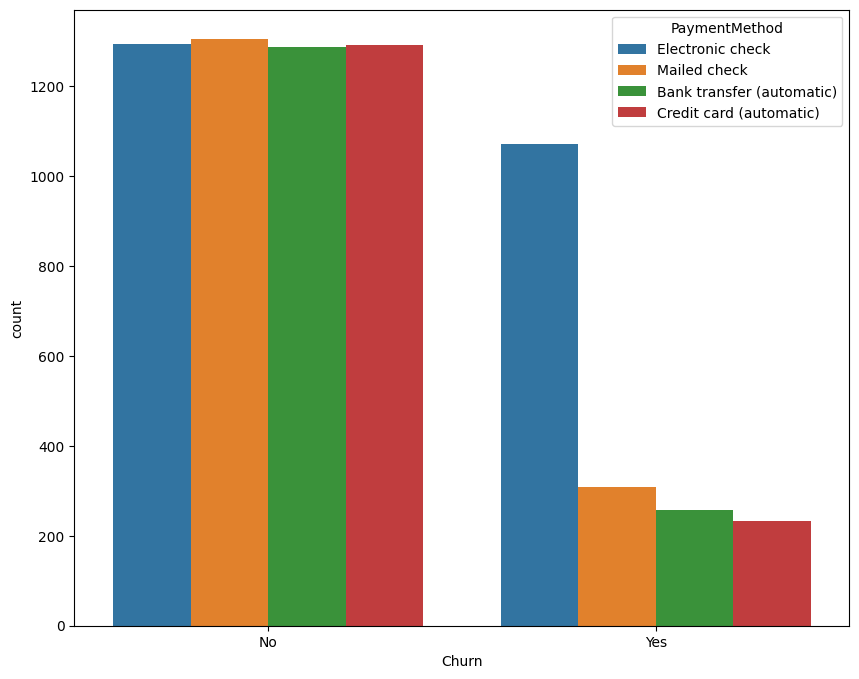

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue="PaymentMethod")

Major customers who moved out had Electronic Check as Payment Method.

# Churn Distribution w.r.t Internet Service

Text(0.5, 1.0, '% of InternetService')

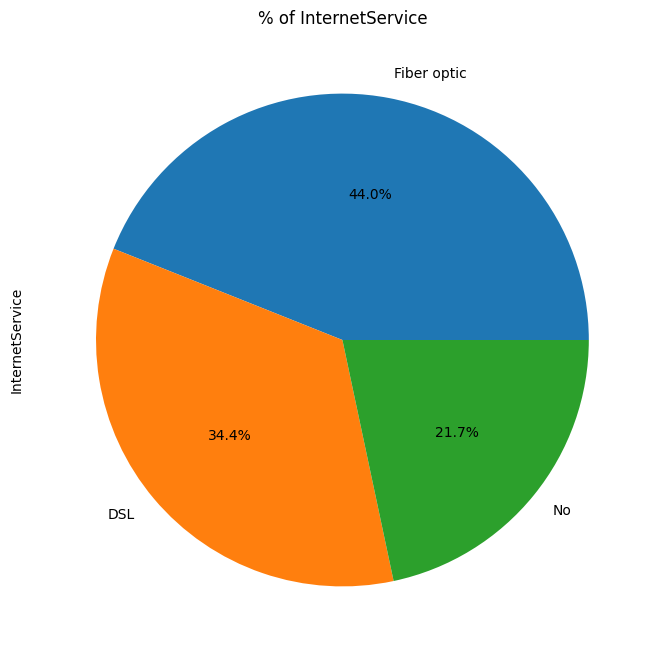

In [18]:
data['InternetService'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of InternetService")

<AxesSubplot: xlabel='Churn', ylabel='count'>

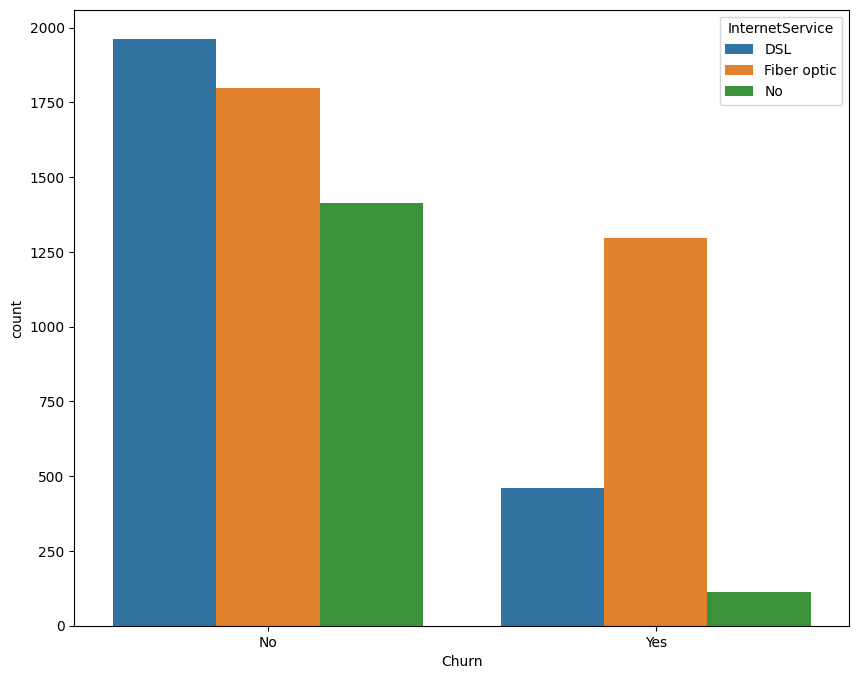

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue=("InternetService"))

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

# Dependents Distribution

Text(0.5, 1.0, '% of Dependents')

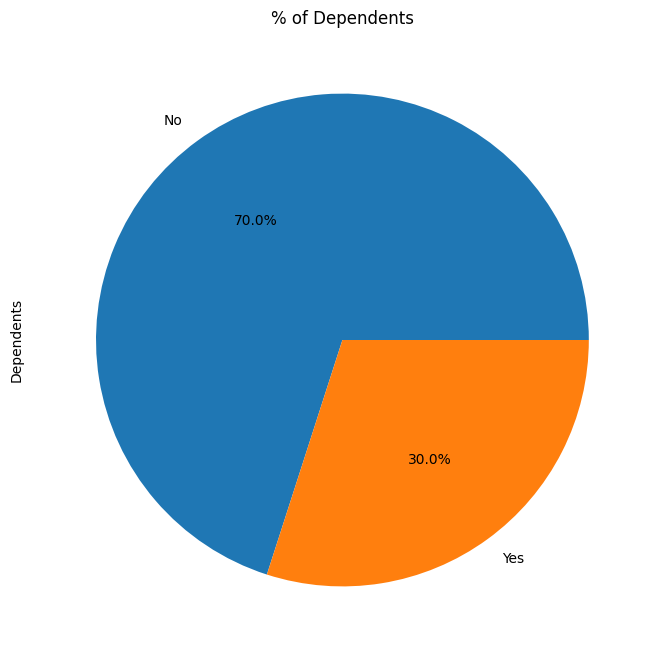

In [20]:
data['Dependents'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Dependents")

<AxesSubplot: xlabel='Churn', ylabel='count'>

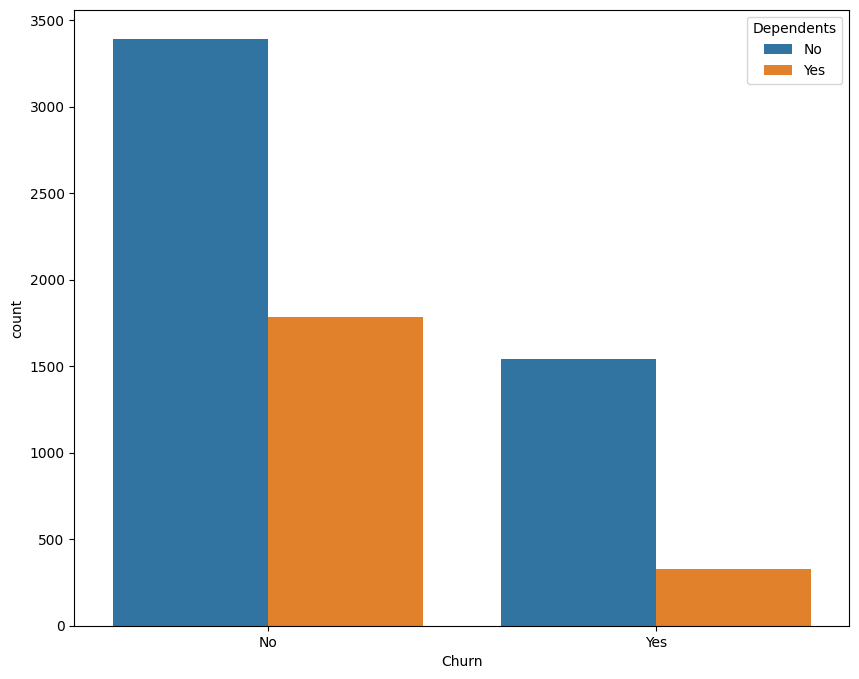

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue=("Dependents"))

Customers without dependents are more likely to churn.

#  Partner Distribution

<AxesSubplot: xlabel='Churn', ylabel='count'>

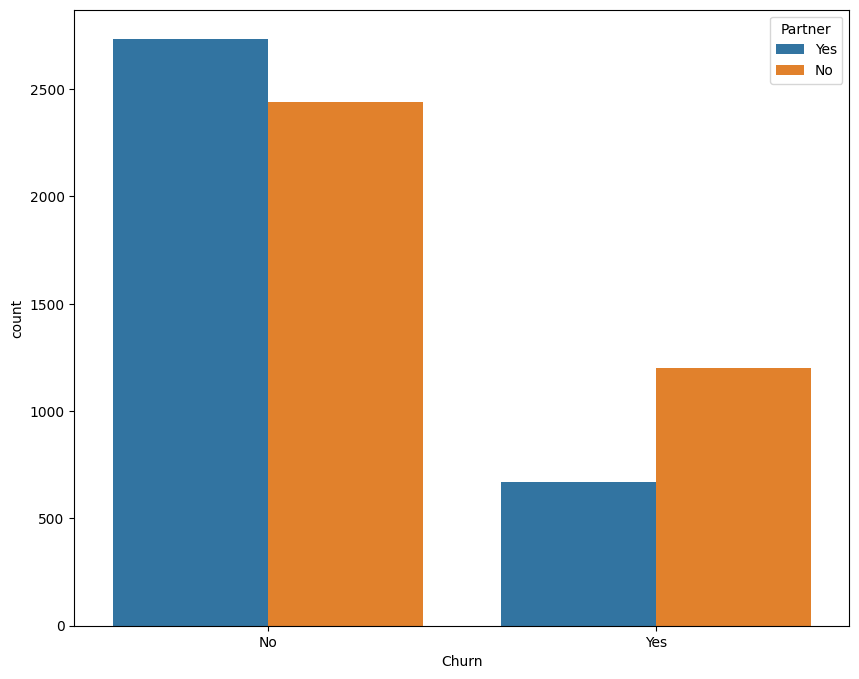

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue="Partner")

Customers that doesn't have partners are more likely to churn.

#  Senior Citizen Distribution

Text(0.5, 1.0, '% of Senior Citizen')

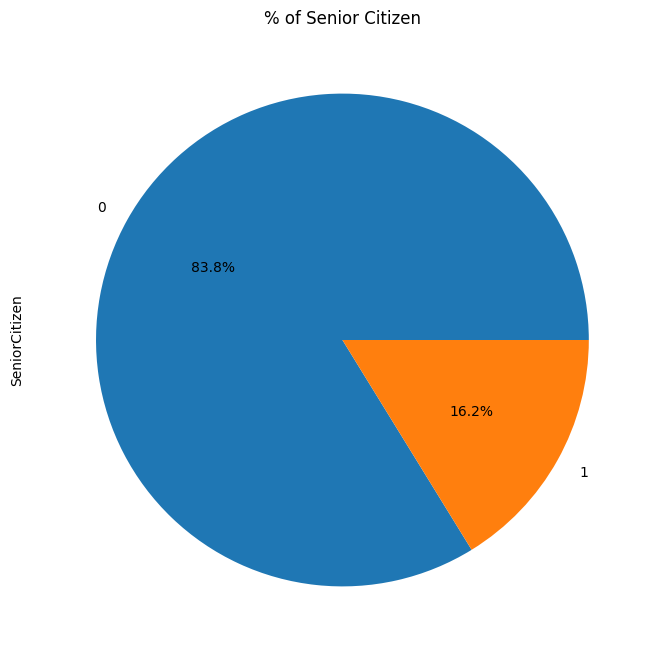

In [23]:
data['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Senior Citizen")

<AxesSubplot: xlabel='Churn', ylabel='count'>

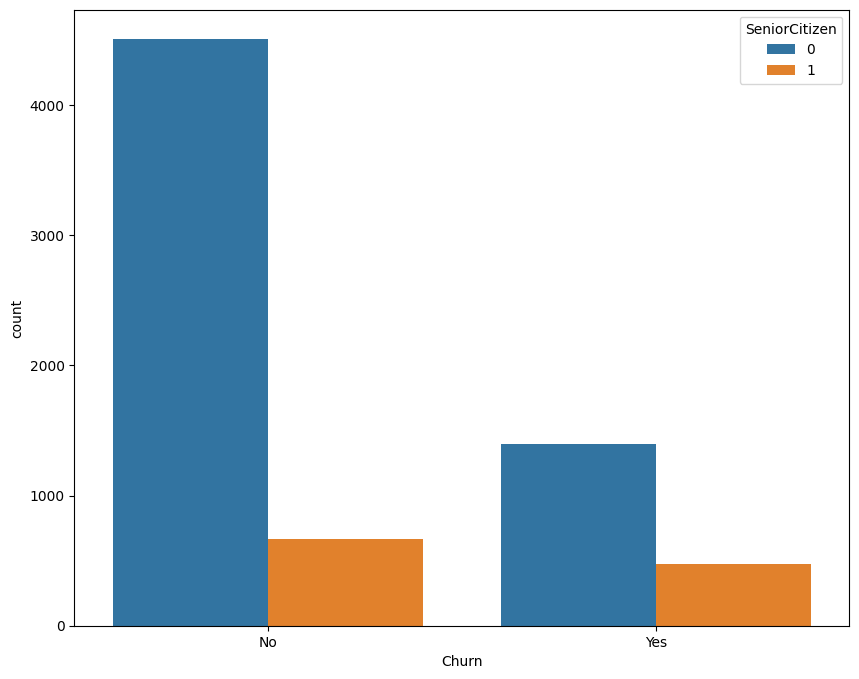

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue="SeniorCitizen")

It can be observed that the there are vey few senior citizens who churns.

# TechSupport Distribution

Text(0.5, 1.0, '% of TechSupport')

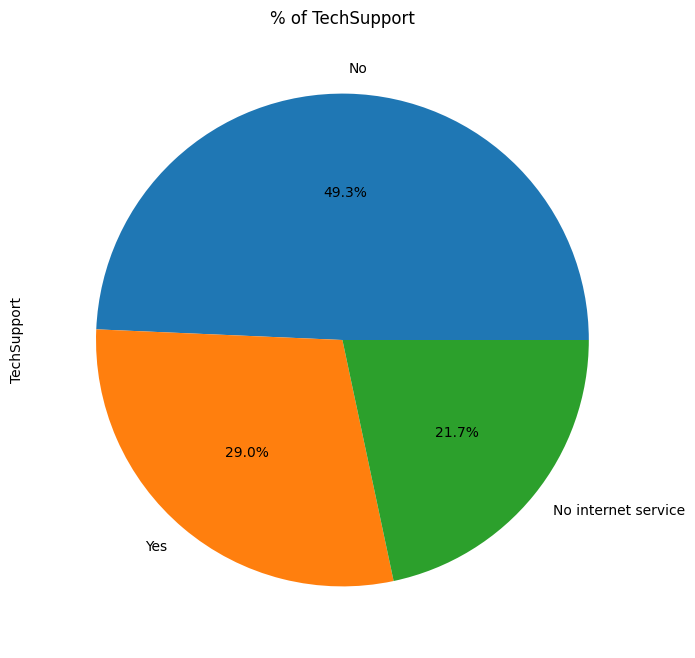

In [25]:
data['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of TechSupport")

<AxesSubplot: xlabel='Churn', ylabel='count'>

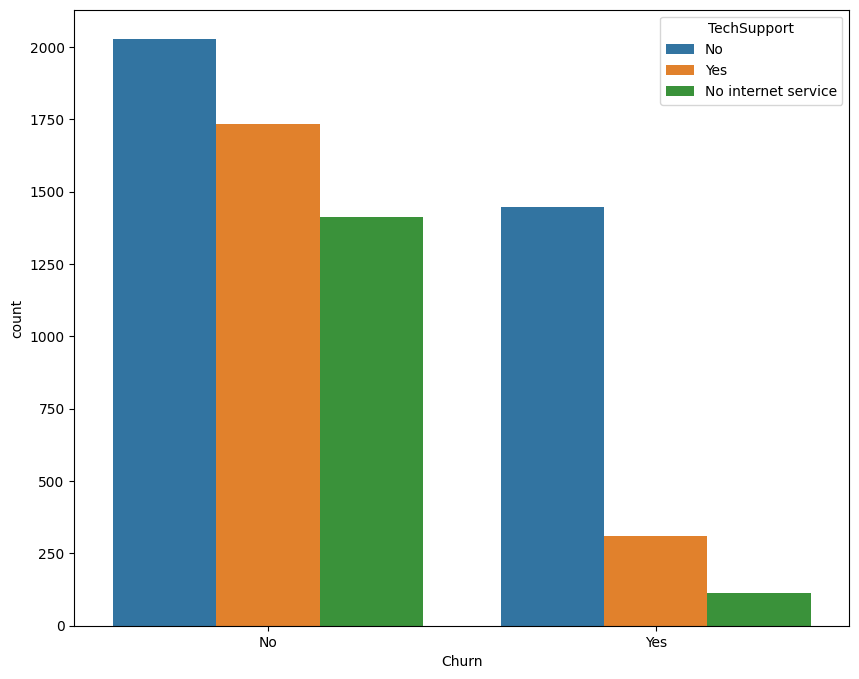

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue=("TechSupport"))

Customers with no TechSupport are most likely to migrate to another service provider.

# Phone Service Distribution

Text(0.5, 1.0, '% of PhoneService')

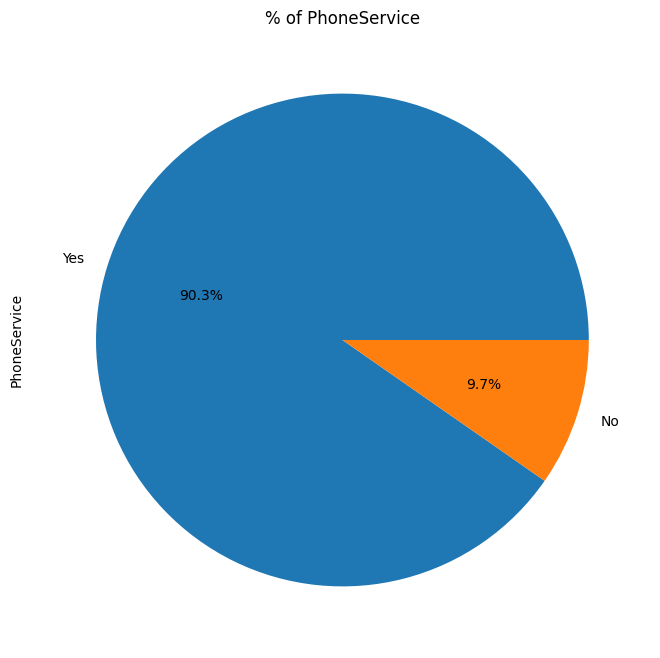

In [27]:
data['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of PhoneService")

<AxesSubplot: xlabel='Churn', ylabel='count'>

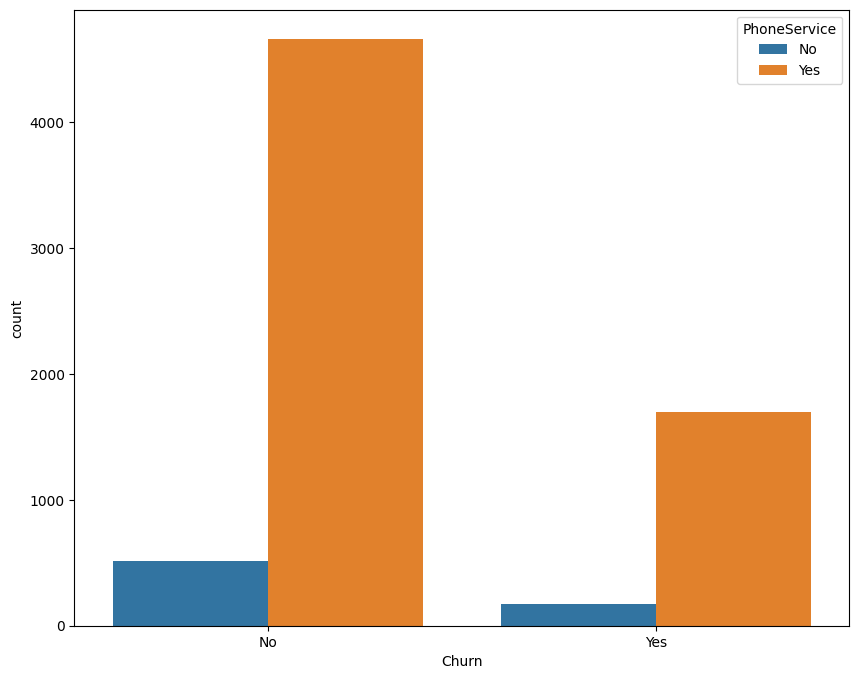

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", data=data,hue=("PhoneService"))

Very small fraction of customers don't have a phone service.

# Outlier Detection

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.

In [29]:
#removing the reduntent columns
data=data.drop(labels=['customerID'],axis=1)

In [30]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

By using this code, the 'TotalCharges' column is being transformed into a numeric type, allowing mathematical operations and further analysis to be performed on the data. Any non-numeric values in the column will be converted to NaN, which can be handled separately as needed.

In [31]:
num_data=data.select_dtypes(include=['float64','int64']).columns

In [32]:
num_data

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [33]:
num_data=num_data.drop('SeniorCitizen')

Text(0.5, 0.98, '\nBox Plot of continuous variables\n')

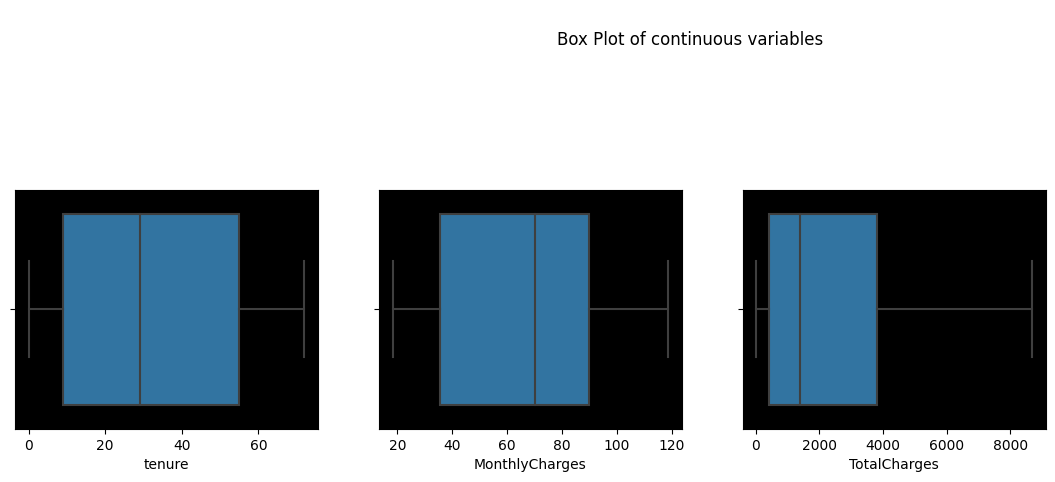

In [34]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(num_data):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,4, i+1)
    sns.boxplot(data=data, x=col)
plt.suptitle('\nBox Plot of continuous variables\n')

Hence there is no outlier in this dataset.

# Missing value Detection

In [35]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Hence now there very missing value in the data . we can easliy remove those values from the data.

In [36]:
# drop observations with null values
data.dropna(inplace=True)

# Categorical Variables Encoding

In [37]:
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [39]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [40]:
data['gender'] = np.where(data['gender']=='Male', 1 , 0)

In [41]:
data['Partner'] = np.where(data['Partner']=='Yes', 1 , 0)

In [42]:
data['Dependents'] = np.where(data['Dependents']=='Yes', 1 , 0)

In [43]:
data['PhoneService'] = np.where(data['PhoneService']=='Yes', 1 , 0)

In [44]:
data['MultipleLines'] = data['MultipleLines'].map({'No phone service': 0, 'No': 1,'Yes': 2})

In [45]:
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No internet service': 0, 'No': 1,'Yes': 2})

In [46]:
data['OnlineBackup'] = data['OnlineBackup'].map({'No internet service': 0, 'No': 1,'Yes': 2})

In [47]:
data['DeviceProtection'] = data['DeviceProtection'].map({'No internet service': 0, 'No': 1,'Yes': 2})

In [48]:
data['TechSupport'] = data['TechSupport'].map({'No internet service': 0, 'No': 1,'Yes': 2})

In [49]:
data['StreamingTV'] = data['StreamingTV'].map({'No internet service': 0, 'No': 1,'Yes': 2})

In [50]:
data['StreamingMovies'] = data['StreamingMovies'].map({'No internet service': 0, 'No': 1,'Yes': 2})

In [51]:
data['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year': 1,'Two year': 2})

In [52]:
data['PaperlessBilling'] = np.where(data['PaperlessBilling']=='Yes', 1 , 0)

In [53]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,1,2,1,1,1,1,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,1,DSL,2,1,2,1,1,1,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,1,DSL,2,2,1,1,1,1,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,2,1,2,2,1,1,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,1,Fiber optic,1,1,1,1,1,1,0,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,DSL,2,1,2,2,2,2,1,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,2,Fiber optic,1,2,2,1,2,2,1,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,2,1,1,1,1,1,0,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,2,Fiber optic,1,1,1,1,1,1,0,1,Mailed check,74.40,306.60,1


In [54]:
data= pd.get_dummies(data, columns = ['InternetService','PaymentMethod'])

In [55]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,2,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,2,1,2,...,56.95,1889.50,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,1,2,2,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,1,2,...,42.30,1840.75,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,1,1,1,1,...,70.70,151.65,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,2,1,2,...,84.80,1990.50,0,1,0,0,0,0,0,1
7039,0,0,1,1,72,1,2,1,2,2,...,103.20,7362.90,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,2,1,1,...,29.60,346.45,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,2,1,1,1,...,74.40,306.60,1,0,1,0,0,0,0,1


This is the transformed data we use for the modeling purpose .

# Scaling 

Data Normalization is transforming numeric columns to a common scale.Some feature values differ from others multiple times. The features with higher values will dominate the learning process .After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this project, i use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [56]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = data[column].min()
        # maximum value of the column
        max_column = data[column].max()
        # min max scaler
        data[column] = (data[column] - min_column) / (max_column - min_column)

In [57]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,1,2,1,...,0.115423,0.001275,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,1,2,1,2,...,0.385075,0.215867,0,1,0,0,0,0,0,1
2,1,0,0,0,0.014085,1,1,2,2,1,...,0.354229,0.010310,1,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,2,1,2,...,0.239303,0.210241,0,1,0,0,1,0,0,0
4,0,0,0,0,0.014085,1,1,1,1,1,...,0.521891,0.015330,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,2,1,2,...,0.662189,0.227521,0,1,0,0,0,0,0,1
7039,0,0,1,1,1.000000,1,2,1,2,2,...,0.845274,0.847461,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,2,1,1,...,0.112935,0.037809,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,2,1,1,1,...,0.558706,0.033210,1,0,1,0,0,0,0,1


In [58]:
#select dependent and independent feature 
x= data.drop(['Churn'], axis = 1)
y = data['Churn']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((5625, 24), (1407, 24))

Also we know that this is a imbalanced data so we need chage this imbalanced data to balanced data using SMOTE technique . 

# Applying  Oversampling SMOTE technique

In [60]:
oversample = SMOTE()
x_resample, y_resample = oversample.fit_resample(x_train, y_train)

In [61]:
# Check the class distribution before oversampling
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Class distribution before SMOTE:", dict(zip(unique_classes, counts)))


Class distribution before SMOTE: {0: 4130, 1: 1495}


In [62]:
# Check the class distribution after oversampling
unique_classes_resampled, counts_resampled = np.unique(y_resample, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique_classes_resampled, counts_resampled)))

Class distribution after SMOTE: {0: 4130, 1: 4130}


# Modeling 

In [63]:
#Importing Logistic Regression from sklearn :
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [64]:
#Fitting:
model1=model.fit(x_resample,y_resample)

In [65]:
x_prediction=model1.predict(x_test)

In [66]:
from sklearn.metrics import classification_report
report = classification_report(y_test,x_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



# Recursive feature elimination

In [69]:
from sklearn.feature_selection import RFE

In [71]:
rfe = RFE(model1)
rfe = rfe.fit(x_resample,y_resample)

In [72]:
list(zip(x_resample,rfe.support_,rfe.ranking_))

[('gender', False, 10),
 ('SeniorCitizen', False, 12),
 ('Partner', False, 11),
 ('Dependents', False, 7),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('MultipleLines', False, 8),
 ('OnlineSecurity', True, 1),
 ('OnlineBackup', False, 2),
 ('DeviceProtection', False, 5),
 ('TechSupport', True, 1),
 ('StreamingTV', False, 3),
 ('StreamingMovies', False, 6),
 ('Contract', True, 1),
 ('PaperlessBilling', False, 13),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('InternetService_DSL', False, 9),
 ('InternetService_Fiber optic', False, 4),
 ('InternetService_No', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1)]

In [73]:
x_resample.columns[rfe.support_]
x_test.columns[rfe.support_]

Index(['tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'InternetService_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [74]:
x_resample1 = x_resample[x_resample.columns[rfe.support_]]
x_test1=x_test[x_test.columns[rfe.support_]]

In [75]:
x_resample1.shape

(8260, 12)

In [76]:
model2=model.fit(x_resample1,y_resample)

In [77]:
x_prediction1=model2.predict(x_test1)

In [78]:
from sklearn.metrics import classification_report
report = classification_report(y_test,x_prediction1)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.75      0.76      1407



#  Using Undersampling   NearMiss

In [79]:
from imblearn.under_sampling import NearMiss

# Create a NearMiss object (NearMiss-1 variant)
nm = NearMiss(version=1)

# Perform undersampling on the dataset
X_resample, Y_resample = nm.fit_resample(x_train, y_train)

In [80]:
# Check the class distribution before undersampling
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Class distribution before Nearmiss:", dict(zip(unique_classes, counts)))


Class distribution before Nearmiss: {0: 4130, 1: 1495}


In [81]:
# Check the class distribution after undersampling
unique_classes, counts = np.unique(Y_resample, return_counts=True)
print("Class distribution before Nearmiss:", dict(zip(unique_classes, counts)))


Class distribution before Nearmiss: {0: 1495, 1: 1495}


In [82]:
model3=model.fit(X_resample,Y_resample)

In [83]:
X_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   2990 non-null   int32  
 1   SeniorCitizen                            2990 non-null   int64  
 2   Partner                                  2990 non-null   int32  
 3   Dependents                               2990 non-null   int32  
 4   tenure                                   2990 non-null   float64
 5   PhoneService                             2990 non-null   int32  
 6   MultipleLines                            2990 non-null   int64  
 7   OnlineSecurity                           2990 non-null   int64  
 8   OnlineBackup                             2990 non-null   int64  
 9   DeviceProtection                         2990 non-null   int64  
 10  TechSupport                              2990 no

In [84]:
X_prediction2=model3.predict(x_test)

In [85]:
from sklearn.metrics import classification_report
report = classification_report(y_test,X_prediction2)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      1033
           1       0.42      0.72      0.53       374

    accuracy                           0.66      1407
   macro avg       0.64      0.68      0.64      1407
weighted avg       0.75      0.66      0.68      1407



In [86]:
rfe = RFE(model)
rfe = rfe.fit(X_resample,Y_resample)

In [87]:
list(zip(X_resample,rfe.support_,rfe.ranking_))

[('gender', False, 12),
 ('SeniorCitizen', True, 1),
 ('Partner', True, 1),
 ('Dependents', False, 7),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('MultipleLines', True, 1),
 ('OnlineSecurity', False, 3),
 ('OnlineBackup', True, 1),
 ('DeviceProtection', True, 1),
 ('TechSupport', True, 1),
 ('StreamingTV', True, 1),
 ('StreamingMovies', True, 1),
 ('Contract', False, 13),
 ('PaperlessBilling', False, 11),
 ('MonthlyCharges', False, 4),
 ('TotalCharges', True, 1),
 ('InternetService_DSL', False, 2),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 10),
 ('PaymentMethod_Bank transfer (automatic)', False, 9),
 ('PaymentMethod_Credit card (automatic)', False, 8),
 ('PaymentMethod_Electronic check', False, 6),
 ('PaymentMethod_Mailed check', False, 5)]

In [88]:
X_resample.columns[rfe.support_]
x_test.columns[rfe.support_]

Index(['SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'MultipleLines',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'TotalCharges', 'InternetService_Fiber optic'],
      dtype='object')

In [89]:
X_resample1 = X_resample[X_resample.columns[rfe.support_]]
x_test1=x_test[x_test.columns[rfe.support_]]

In [90]:
X_resample1.shape

(2990, 12)

In [91]:
model4=model.fit(X_resample1,Y_resample)
model4

LogisticRegression()

In [92]:
X_resample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeniorCitizen                2990 non-null   int64  
 1   Partner                      2990 non-null   int32  
 2   tenure                       2990 non-null   float64
 3   PhoneService                 2990 non-null   int32  
 4   MultipleLines                2990 non-null   int64  
 5   OnlineBackup                 2990 non-null   int64  
 6   DeviceProtection             2990 non-null   int64  
 7   TechSupport                  2990 non-null   int64  
 8   StreamingTV                  2990 non-null   int64  
 9   StreamingMovies              2990 non-null   int64  
 10  TotalCharges                 2990 non-null   float64
 11  InternetService_Fiber optic  2990 non-null   uint8  
dtypes: float64(2), int32(2), int64(7), uint8(1)
memory usage: 236.6 KB


In [93]:
X_prediction3=model4.predict(x_test1)

In [94]:
from sklearn.metrics import classification_report
report = classification_report(y_test,X_prediction3)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1033
           1       0.45      0.73      0.55       374

    accuracy                           0.69      1407
   macro avg       0.66      0.70      0.66      1407
weighted avg       0.76      0.69      0.70      1407



#  Model evaluation criterion:

Since this is a binary classification problem, the model can make wrong predictions in one of two ways:

1.Predicting a customer is not leaving  when the customer actually is leaving  - Financial loss of the company.

2.Predicting a customer is leaving when the customer is actually not leaving  -  there is no loss for this case.

Which case is more important?

Predicting that the customer is not leaving when he is leaving  which would result in financial loss to the company.

So We need to reduce this loss i.e need to reduce False Negatives.

In classification, the class of interest is considered the positive class,as a result company can take actions according to it,  in other words Recall is the evaluation criterion to be maximized.

Here we get the highest recall in case of using logistic regression after applyling SMOTE and Recursive feature elimination